In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'sans serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })

import warnings
warnings.filterwarnings("ignore")

T_colors = ["lightskyblue", "violet", "forestgreen", "darkviolet", "thistle", "cadetblue", 
            "palegoldenrod", "darksalmon", "indigo"]

import h5py

import glob
import os
os.chdir("../../../../analysis_scripts/")
from cholla_py_utils import ChollaPyUtils
os.chdir("../research/cholla/dust_model/cuda/")
cholla_helper = ChollaPyUtils()

In [2]:
T = 1e5 # K
n = 1 # cm^-3
n_ch = cholla_helper.n_ch(n)
d_ch = cholla_helper.calc_d_ch(n_ch)
P_ch = cholla_helper.calc_P_ch(T, n_ch)

In [3]:
print(d_ch)
print(P_ch)

14827371.70126647
468717522464.04584


Text(0, 0.5, '$T~[K]$')

<Figure size 720x576 with 0 Axes>

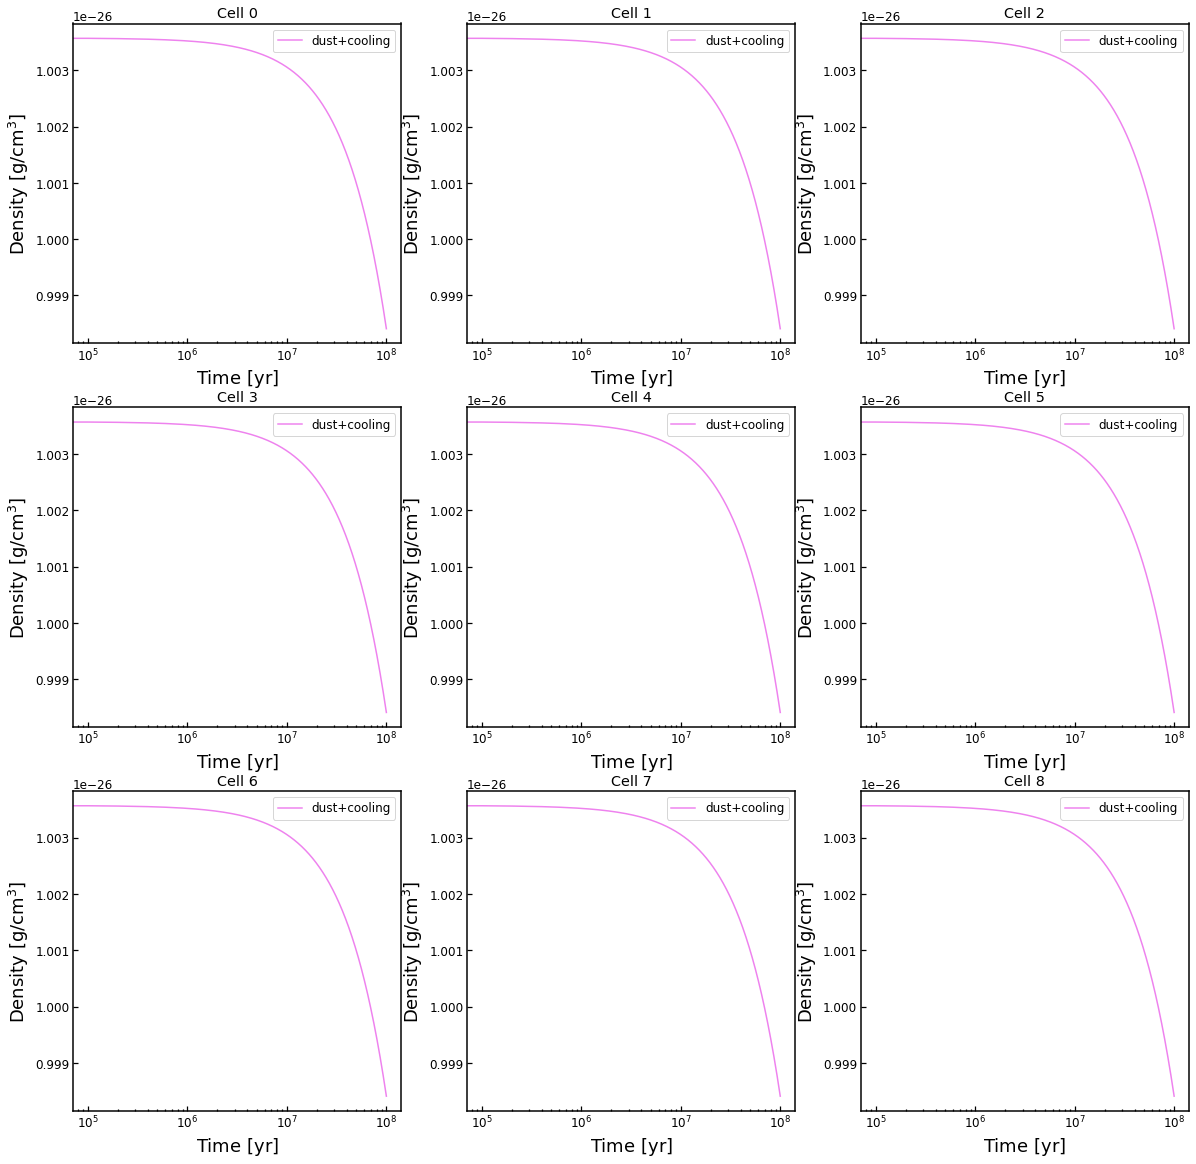

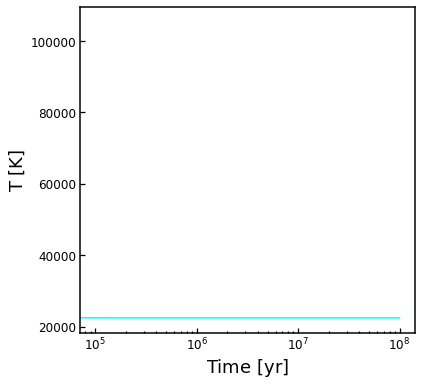

In [35]:
tests = ["const_1D_cool_5k"]
n = 1000

t_arr = []
d_gas = []
d_dust = []

T = []

nx = None

for test_i in tests:
    dnamein = f"./cholla_out/{test_i}/"
    dnameout = f"./cholla_out/{test_i}/"
    i_out = np.arange(0, n)
    DE = 0
    for i in i_out:
        f = h5py.File(dnamein + str(i) + ".h5.0", "r")
        head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
        a_group_key = list(f.keys())
        
        nx = head["dims"][0]
        t_arr.append(cholla_helper.t_cgs(head["t"])/cholla_helper._YR_IN_S)
        d_gas.append(cholla_helper.d_cgs(np.array(f["density"])))
        d_dust.append(cholla_helper.d_cgs(np.array(f["scalar0"])))
        
        d_gas_ch = np.array(f["density"]) # mass density
        mx = np.array(f["momentum_x"]) # x-momentum
        my = np.array(f["momentum_y"]) # y-momentum
        mz = np.array(f["momentum_z"]) # z-momentum
        E_ch = np.array(f["Energy"]) # total energy density
        vx_ch = mx / d_ch
        vy_ch = my / d_ch
        vz_ch = mz / d_ch
        T.append(cholla_helper.calc_T(E_ch, vx_ch, vy_ch, vz_ch, d_gas_ch))

fig = plt.figure(figsize=(10,8))
        
fig, axs = plt.subplots(3, 3, constrained_layout=False, figsize=(20,20))
for i, ax in enumerate(axs.flat):
    ax.semilogx(t_arr, list(zip(*d_dust))[i], color="violet", label="dust+cooling")
    ax.set_title(f"Cell {i}")
    ax.set_xlabel("Time$~[yr]$", fontsize=18)
    ax.set_ylabel(r"Density$~[g/cm^3]$", fontsize=18)
    ax.legend()

fig = plt.figure(figsize=(6,6))
plt.semilogx(t_arr, list(zip(*T))[i], color="cyan")
plt.xlabel("Time$~[yr]$", fontsize=18)
plt.ylabel(r"$T~[K]$", fontsize=18)